In [1]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")


Формула очень похожа на формулу линейной регрессии, но теперь вместо того, чтобы просто возвратить взвешенную сумму признаков, мы задаем для прогнозируемого значения порог, равный нулю. Если функция меньше нуля, мы прогнозируем класс –1, если она больше нуля, мы прогнозируем класс +1. Это прогнозное правило является общим для всех линейных моделей классификации. Опять же, есть много различных способов найти коэффициенты (w) и константу (b).Для линейных моделей регрессии выход yˆ является линейной функцией признаков: линией, плоскостью или гиперплоскостью (для большого количества измерений). Для линейных моделей классификации 
граница принятия решений(decision boundary)
является линейной функцией аргумента. Другими словами, (бинарный) линейный классификатор –это классификатор, который разделяет два класса с помощью линии, плоскости или гиперплоскости. В этом разделе мы приведем кокретные примеры.

Два критерия задают различия между алгоритмами:
 •Измеряемые метрики качества подгонки обучающих данных
 •Факт использования регуляризации и вид регуляризации, если она используется

С точки зрения поставленных нами целей и различных сфер применения различные варианты метрик качества подгонки (так называемые функции потерьили loss functions) не имеют большого значения.

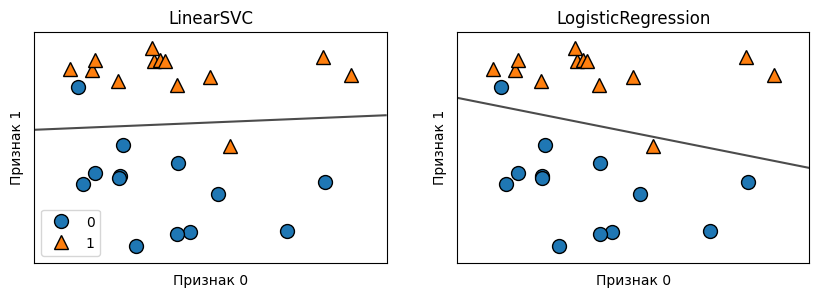

In [2]:

from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")
    axes[0].legend()
plt.show()


Двумя наиболее распространенными алгоритмами линейной классификации являются логистическая регрессия(logistic regression), реализованная в классе linear_model.LogisticRegression, и линейный метод опорных векторов(linear support vector machines)или линейный SVM, реализованный в классе svm.LinearSVC(SVC расшифровывается как support vector classifier–классификатор опорных векторов)

Они представлены в виде прямых линий, отделяющих область значений, классифицированных как класс 1 (в верхней части графика) от области значений, классифицированных как класс 0 (в нижней части графика)

По умолчанию обе модели используют L2 регуляризацию, тот же самый метод, который используется в гребневой регрессии

Для LogisticRegression и LinearSVC компромиссный параметр, который определяет степень регуляризации, называется C, и более высокие значения C соответствуют меньшейрегуляризации. Другими словами, когда вы используете высокое значение параметра C, LogisticRegression и LinearSVC пытаются подогнать модель к обучающим данным как можно лучше, тогда как при низких значениях параметра C модели делают больший акцент на поиске вектора коэффициентов (w), близкого к нулю

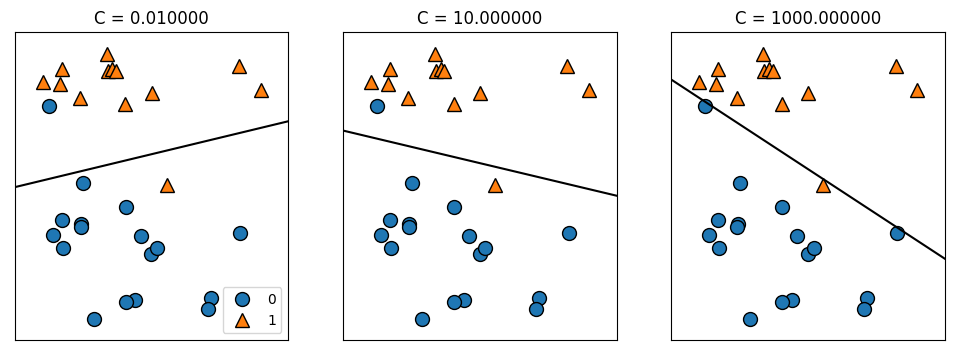

In [3]:

mglearn.plots.plot_linear_svc_regularization()
plt.show()


In [4]:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# компромиссный парам
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))



Правильность на обучающем наборе: 0.946
Правильность на тестовом наборе: 0.951


In [5]:

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))



Правильность на обучающем наборе: 0.953
Правильность на тестовом наборе: 0.958


Использование C=100 привело к более высокой правильности на обучающей выборке, а также немного увеличилась правильность на тестовой выборке, что подтверждает наш довод о том, что более сложная модель должна сработать лучше.

In [6]:

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))


Правильность на обучающем наборе: 0.934
Правильность на тестовом наборе: 0.930


Как и следовало ожидать, когда мы получили недообученную модельпереместились влево по шкале, правильность как на обучающем, так и на тестовом наборах снизилась по сравнению с правильностью, которую мы получили, использовав параметры по умолчанию

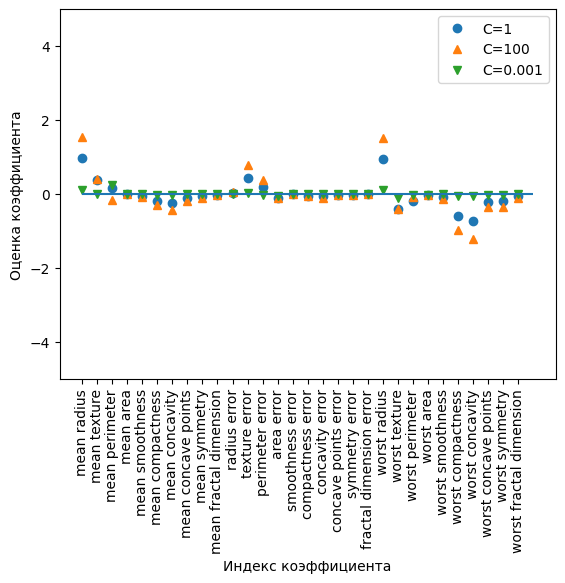

In [7]:


plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
plt.show()


Если мы хотим получить более интерпретабельную модель, нам может помочь L1 регуляризация, поскольку она ограничивает модель использованием лишь нескольких признаков.


Правильность на обучении для логрегрессии l1 с C=0.001: 0.95
Правильность на тесте для логрегрессии l1 с C=0.001: 0.94


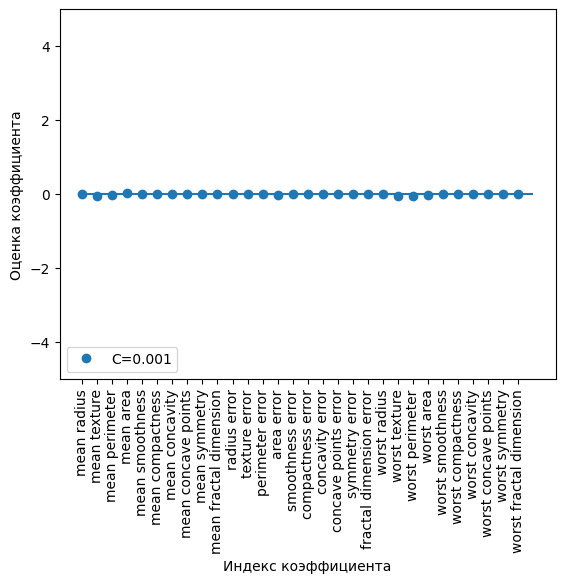


Правильность на обучении для логрегрессии l1 с C=1.000: 0.95
Правильность на тесте для логрегрессии l1 с C=1.000: 0.95


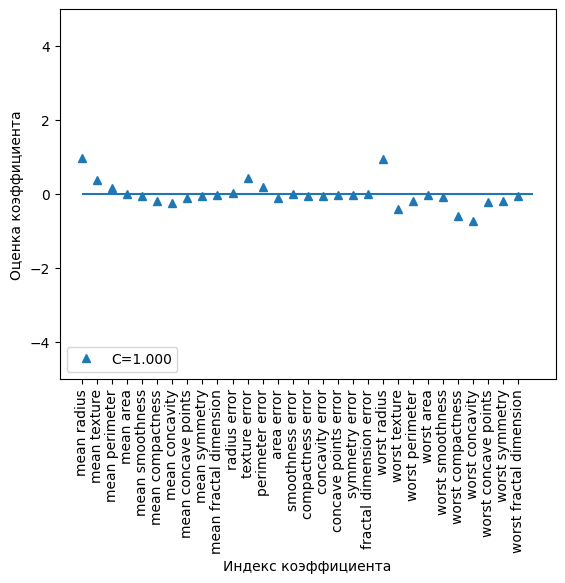


Правильность на обучении для логрегрессии l1 с C=100.000: 0.95
Правильность на тесте для логрегрессии l1 с C=100.000: 0.96


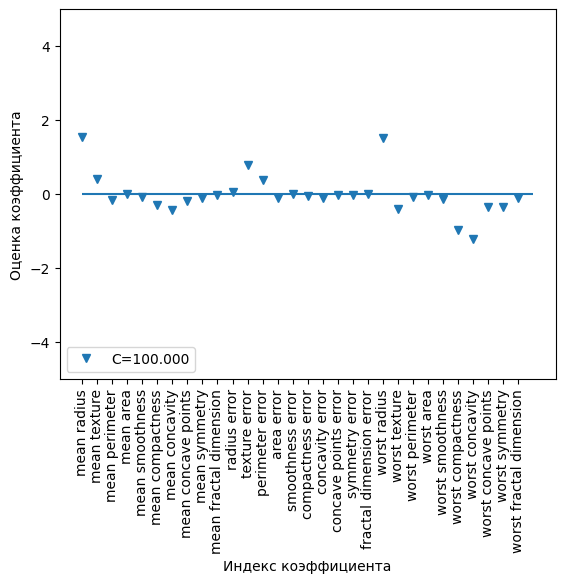

In [8]:

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C).fit(X_train, y_train)
    print("\nПравильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))

    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0, cancer.data.shape[1])
    plt.xlabel("Индекс коэффициента")
    plt.ylabel("Оценка коэффициента")
    plt.ylim(-5, 5)
    plt.legend(loc=3)
    plt.show()